In [1]:
import xarray as xr 
import numpy as np
import math 
import glob
import s3fs 
import warnings 
import matplotlib.pyplot as plt
import zarr

In [2]:
# open the data with s3fs from the databucket 
fsg = s3fs.S3FileSystem(anon=False,
      client_kwargs={
         'endpoint_url': 'https://karen.uiogeo-apps.sigma2.no'
      })
data_path2 = 's3://data/vel_dataIII.zarr/vel_dataIII.zarr'
data_path3 = 's3://data/lat_lon_scalar.zarr'
remote_files2 = fsg.glob(data_path2)
remote_files3 = fsg.glob(data_path3)

store2 = s3fs.S3Map(root=data_path2, s3=fsg, check=False)
store3 = s3fs.S3Map(root=data_path3, s3=fsg, check=False)

dv = xr.open_zarr(store=store2, consolidated=True)
dl = xr.open_zarr(store=store3, consolidated=True)

In [3]:
zonal = dl.d_zonal
merd = dl.d_merd

In [4]:
dv

<xarray.Dataset>
Dimensions:        (depth: 75, t: 1, time_counter: 73, x: 1200, y: 900)
Coordinates:
  * depth          (depth) float32 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
    nav_lat        (y, x) float32 dask.array<chunksize=(900, 1200), meta=np.ndarray>
    nav_lon        (y, x) float32 dask.array<chunksize=(900, 1200), meta=np.ndarray>
    time_centered  (time_counter) object dask.array<chunksize=(73,), meta=np.ndarray>
  * time_counter   (time_counter) object 2000-01-03 12:00:00 ... 2000-12-29 1...
Dimensions without coordinates: t, x, y
Data variables:
    mbathy         (t, y, x) int16 dask.array<chunksize=(1, 900, 1200), meta=np.ndarray>
    vel            (time_counter, depth, y, x) float32 dask.array<chunksize=(1, 75, 900, 1200), meta=np.ndarray>
    vomecrty       (time_counter, depth, y, x) float32 dask.array<chunksize=(1, 75, 900, 1200), meta=np.ndarray>
    vozocrtx       (time_counter, depth, y, x) float32 dask.array<chunksize=(1, 75, 900, 1200), meta=np.ndarray>
Attributes:
    cell_methods:        time: mean (interval: 360 s)
    interval_operation:  360 s
    interval_write:      5 d
    long_name:           sea_water_x_velocity
    online_operation:    average
    standard_name:       sea_water_x_velocity
    units:               m/s

In [5]:
d = dv.mbathy
u = dv.vozocrtx
v = dv.vomecrty
vel = np.sqrt(u**2 + v**2)

In [7]:
d_hbx = d.isel(y=slice(0,899)).diff(dim='x')
d_hbx = d_hbx.squeeze(axis=0)
d_hby = d.isel(x=slice(0,1199)).diff(dim='y')
d_hby = d_hby.squeeze(axis=0)

len_bat = np.sqrt((d_hbx/zonal)**2 + (d_hby/merd)**2)

503 502
638 300
871 602
820 200
520 350


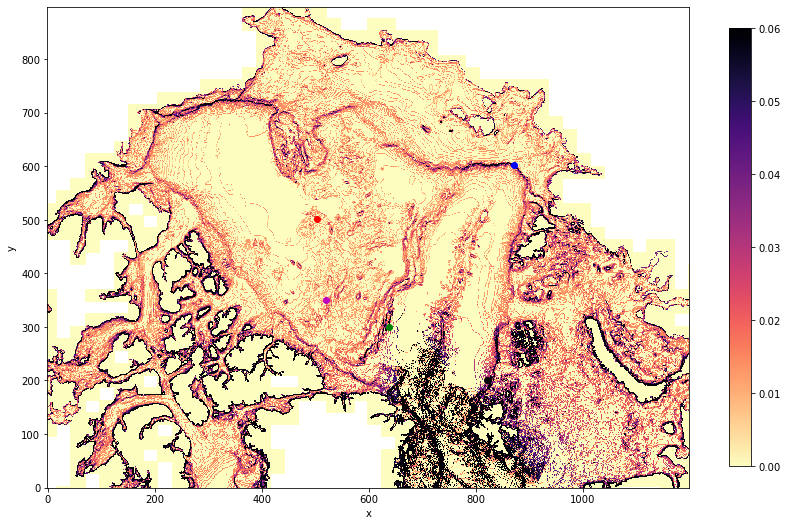

In [8]:
warnings.simplefilter("ignore")
punkt_list = [(503,502), (638,300), (871,602), (820,200), (520,350)]

fig, axs = plt.subplots(1,1,figsize=(12,9))
c_list = ['r', 'g', 'b', 'k', 'm']

cmap = plt.get_cmap('magma_r')
c = len_bat.plot(vmin=0, vmax=0.06, cmap=cmap, add_colorbar=False)
for p in range(len((punkt_list))):
    pp = punkt_list[p]
    print(pp[0], pp[1]) 
    axs.plot(pp[0],pp[1] ,marker = 'o' ,color = c_list[p])
    
fig.colorbar(c,
             shrink=0.7,
             #label=r"Depth [m]"
            )
axs.set_aspect('equal')
fig.tight_layout()

503 502
638 300
871 602
820 200
520 350


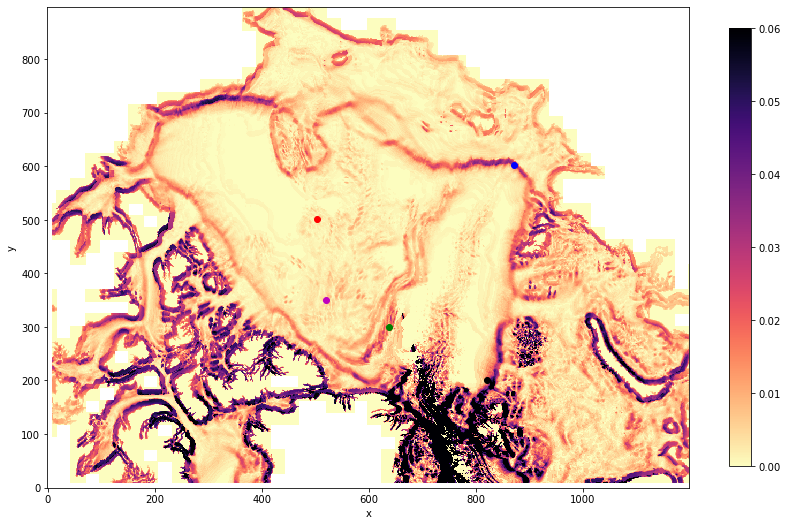

In [9]:
'Glatte bathymetrien først'
warnings.simplefilter("ignore")

d_hbxg = d_hbx.rolling(x= 10,).mean()
d_hbyg = d_hby.rolling(y= 10,).mean()

len_batg = np.sqrt((d_hbxg/zonal)**2 + (d_hbyg/merd)**2)

punkt_list = [(503,502), (638,300), (871,602), (820,200), (520,350)]

fig, axs = plt.subplots(1,1,figsize=(12,9))
c_list = ['r', 'g', 'b', 'k', 'm']

cmap = plt.get_cmap('magma_r')
c = len_batg.plot(vmin=0, vmax=0.06, cmap=cmap, add_colorbar=False)
for p in range(len((punkt_list))):
    pp = punkt_list[p]
    print(pp[0], pp[1]) 
    axs.plot(pp[0],pp[1] ,marker = 'o' ,color = c_list[p])
fig.colorbar(c,
             shrink=0.7,
             #label=r"Depth [m]"
            )    
axs.set_aspect('equal')
fig.tight_layout()

'zoomed in to see resolutin'
punkt_list = [(53,52), (38,50), (71,52), (820,200), (520,350)]

fig, axs = plt.subplots(1,1,figsize=(20,15))

cmap = plt.get_cmap('magma_r')
c = len_bat.isel(x=slice(450,550),y=slice(450,550)).plot(vmin=0, vmax=0.06, cmap=cmap)

pp = punkt_list[0]
print(pp[0], pp[1]) 
axs.plot(pp[0],pp[1] ,marker = 'o' ,color = 'b')
axs.set_aspect('equal')

In [10]:
for p in punkt_list:
    pp = p
    y=pp[1]
    x=pp[0]
    print(pp[0], pp[1])
    d_hbx_p = d_hbx.isel(y=y, x=x)
    d_hby_p = d_hby.isel(y=y, x=x)
    zonalp = zonal.isel(x=x,y=y)
    merdp = merd.isel(x=x, y=y)
    print('-------------------')
    print((d_hbx_p/zonalp).values, (d_hby_p/merdp).values)
    print('new point')

503 502
-------------------
-0.0 0.012180641
new point
638 300
-------------------
-0.023390058 -0.011324999
new point
871 602
-------------------
-0.031962655 -0.038862083
new point
820 200
-------------------
-0.032732025 0.0
new point
520 350
-------------------
0.009189493 0.0
new point


In [11]:
'Making a function for the vertical PC'
def PCz(x,y):
    up = u.isel(y=y, x=x)
    vp = v.isel(y=y, x=x)

    zonalp = zonal.isel(y=y, x=x)
    merdp = merd.isel(y=y, x=x)

    d_hbx_p = d_hbxg.isel(y=y, x=x)
    d_hby_p = d_hbyg.isel(y=y, x=x)
    
    # lag lengde scalar av bathym og dele u_o og u_p på 

    vel_ort = (up*(d_hbx_p/zonalp) + vp*(d_hby_p/merdp))/np.sqrt(d_hbx_p**2 + d_hby_p**2) # delt på lengden av bathymetrien
    vel_par = (up*(d_hby_p/merdp)  - vp*(d_hbx_p/zonalp))/np.sqrt(d_hbx_p**2 + d_hby_p**2)
    
    d_p = d.isel(y=y, x=x).values
    dyp_o = vel_ort.isel(depth = slice(12,int(d_p)-1)) # -1 pga d=0 og vi vil en opp der vi har bunnhastigheter
    dyp_p = vel_par.isel(depth = slice(12,int(d_p)-1))

    cov_o = np.cov(dyp_o.T, bias=True) # uten .T ble den en 73x73 matrise 
    cov_p = np.cov(dyp_p.T, bias=True)
    
    values_o, vectors_o = np.linalg.eig(cov_o)
    order_o = values_o.argsort()[::-1]
    values_o, vectors_o = values_o[order_o], vectors_o[:, order_o]
    values_p, vectors_p = np.linalg.eig(cov_p)
    order_p = values_p.argsort()[::-1]
    values_p, vectors_p = values_p[order_p], vectors_p[:, order_p]
    
    PCp = np.sqrt(values_p[0])*vectors_p[:,0]
    PCo = np.sqrt(values_o[0])*vectors_o[:,0]
    
    return PCp, PCo, dyp_p, dyp_o

In [ ]:
warnings.simplefilter("ignore")
fig, axes = plt.subplots(1,5,figsize = (18,7))
plt.suptitle('PC1 from velocity parallell and ortoghonal to the slope calculated from model-data at different location; see map ', 
             horizontalalignment='center',
            fontsize=24)
axes[0].set_ylabel('Depth [m]', fontsize=14)

for axs, p in zip(axes.flat, range(len((punkt_list)))):
    pp = punkt_list[p]
    print(pp[0], pp[1])    
    PCp, PCo, dypp, dypo = PCz(pp[0],pp[1])
        
    axs.plot(PCp,dypp.depth, 'g', label = 'The velocity parallel to the slope')
    axs.plot(PCo,dypo.depth, 'r', label = 'The velocity orthogonal to the slope')
    axs.axvline(0, color='k', linestyle = '--')
    axs.legend(frameon=False, fontsize=14, loc="upper left") 
    axs.invert_yaxis()
    axs.set_xlabel('Variance in current speed [cm^2/m^2]', fontsize=14)


503 502
638 300
